# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 30

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
156,Butland,Crystal Palace,44,6.0,19,26.379777,3.2,4.396630,4.359068,27.722131,2.096011
129,Arrizabalaga,Chelsea,46,4.0,19,17.598712,4.8,4.399678,NaN,30.953338,2.051360
448,Gunn,Norwich City,40,7.0,26,26.130553,3.7,3.732936,2.744457,28.056101,1.866468
80,Raya,Brentford,43,16.0,63,60.268484,3.9,3.766780,3.613638,28.984002,1.816503
559,Ramsdale,Arsenal,51,24.0,117,97.301636,4.9,4.054235,3.996159,35.726122,1.795245
231,Alisson,Liverpool,60,27.0,138,114.667079,5.1,4.246929,7.202462,30.762096,1.733801
270,de Gea,Manchester Utd,51,29.0,113,112.923043,3.9,3.893898,2.943087,33.047210,1.724247
475,Sá,Wolves,53,30.0,131,116.488071,4.4,3.882936,3.730014,30.766844,1.686639
146,Guaita,Crystal Palace,46,24.0,89,86.519110,3.7,3.604963,4.275719,30.798264,1.680823


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,54,37.569068,9.0,6.261511,NaN,36.892248,2.645971
237,Alexander-Arnold,Liverpool,84,26.0,187,169.232780,7.2,6.508953,7.469129,36.967380,2.245802
142,James,Chelsea,62,17.0,109,94.570525,6.4,5.562972,10.932196,35.488124,2.234143
256,Cancelo,Manchester City,69,27.0,162,156.860358,6.0,5.809643,5.520487,37.931322,2.211693
245,Tsimikas,Liverpool,37,10.0,38,41.084992,3.8,4.108499,6.968316,25.289526,2.135907
360,Doherty,Tottenham,48,13.0,52,59.438852,4.0,4.572219,6.882254,34.244347,2.086923
252,Stones,Manchester City,52,11.0,62,50.882072,5.6,4.625643,5.306918,33.329496,2.028479
122,Alonso,Chelsea,55,19.0,78,89.627881,4.1,4.717257,1.771000,29.892684,2.011445
501,Sarr,Chelsea,49,5.0,29,22.148390,5.8,4.429678,5.580632,34.096169,2.001125


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.196643,6.5,6.299161,NaN,29.184611,2.433578
233,Salah,Liverpool,133,27.0,222,211.025020,8.2,7.815741,16.118366,49.698710,2.143110
681,Coutinho,Aston Villa,75,10.0,59,54.843678,5.9,5.484368,6.725214,29.302881,2.002608
420,Bowen,West Ham,68,28.0,153,145.556317,5.5,5.198440,2.532886,32.839123,1.993511
701,Kulusevski,Tottenham,63,9.0,47,43.689494,5.2,4.854388,7.858290,29.644705,1.934035
265,Foden,Manchester City,78,21.0,103,111.493625,4.9,5.309220,4.392622,32.402680,1.901006
240,Jota,Liverpool,83,26.0,133,137.650945,5.1,5.294267,1.066436,27.763041,1.837667
250,Gündogan,Manchester City,71,20.0,89,96.683214,4.5,4.834161,4.428543,34.077132,1.814228
196,Raphinha,Leeds United,65,27.0,112,124.789753,4.1,4.621843,7.059551,29.841374,1.812836


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
78,Toney,Brentford,67,25.0,109,107.542,4.4,4.301680,6.550000,31.254801,1.661884
177,Calvert-Lewin,Everton,77,10.0,35,44.231,3.5,4.423100,0.857000,29.519417,1.593975
357,Kane,Tottenham,125,28.0,136,150.766,4.9,5.384500,10.996800,37.927571,1.522967
450,Dennis,Watford,60,27.0,115,100.326,4.3,3.715778,6.175000,30.092487,1.516960
315,Pukki,Norwich City,59,28.0,104,100.202,3.7,3.578643,5.492750,29.822760,1.473304
413,Antonio,West Ham,75,29.0,114,116.788,3.9,4.027172,2.874200,32.544869,1.470515
579,Ronaldo,Manchester Utd,122,24.0,117,122.653,4.9,5.110542,6.433333,40.840161,1.463144
468,King,Watford,57,26.0,79,89.704,3.0,3.450154,2.550000,25.857258,1.445110
345,Adams,Southampton,69,23.0,92,83.684,4.0,3.638435,5.510500,33.820755,1.385128


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
233,Salah,Liverpool,133,27.0,222,211.025020,8.2,7.815741,49.698710,2.143110
237,Alexander-Arnold,Liverpool,84,26.0,187,169.232780,7.2,6.508953,36.967380,2.245802
268,Torres,Manchester City,67,4.0,26,25.196643,6.5,6.299161,29.184611,2.433578
135,Chilwell,Chelsea,56,6.0,54,37.569068,9.0,6.261511,36.892248,2.645971
359,Son,Tottenham,109,26.0,165,153.974426,6.3,5.922093,42.254703,1.793750
253,Mendy,Manchester City,52,1.0,3,5.825643,3.0,5.825643,29.255751,2.554713
256,Cancelo,Manchester City,69,27.0,162,156.860358,6.0,5.809643,37.931322,2.211693
230,Mané,Liverpool,117,26.0,140,149.421945,5.4,5.746998,39.961685,1.680150
142,James,Chelsea,62,17.0,109,94.570525,6.4,5.562972,35.488124,2.234143


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,9.0,6.261511,NaN,36.892248,2.645971
268,Torres,Manchester City,67,4.0,6.5,6.299161,NaN,29.184611,2.433578
237,Alexander-Arnold,Liverpool,84,26.0,7.2,6.508953,7.469129,36.967380,2.245802
142,James,Chelsea,62,17.0,6.4,5.562972,10.932196,35.488124,2.234143
256,Cancelo,Manchester City,69,27.0,6.0,5.809643,5.520487,37.931322,2.211693
233,Salah,Liverpool,133,27.0,8.2,7.815741,16.118366,49.698710,2.143110
245,Tsimikas,Liverpool,37,10.0,3.8,4.108499,6.968316,25.289526,2.135907
156,Butland,Crystal Palace,44,6.0,3.2,4.396630,4.359068,27.722131,2.096011
360,Doherty,Tottenham,48,13.0,4.0,4.572219,6.882254,34.244347,2.086923


In [11]:
metric = 'adjusted points per game'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
233,Salah,Liverpool,133,27.0,222,211.025020,8.2,7.815741,10.412826,49.698710,2.143110
237,Alexander-Arnold,Liverpool,84,26.0,187,169.232780,7.2,6.508953,5.896180,36.967380,2.245802
268,Torres,Manchester City,67,4.0,26,25.196643,6.5,6.299161,NaN,29.184611,2.433578
135,Chilwell,Chelsea,56,6.0,54,37.569068,9.0,6.261511,NaN,36.892248,2.645971
359,Son,Tottenham,109,26.0,165,153.974426,6.3,5.922093,7.952850,42.254703,1.793750
256,Cancelo,Manchester City,69,27.0,162,156.860358,6.0,5.809643,5.677897,37.931322,2.211693
230,Mané,Liverpool,117,26.0,140,149.421945,5.4,5.746998,9.135391,39.961685,1.680150
142,James,Chelsea,62,17.0,109,94.570525,6.4,5.562972,10.932196,35.488124,2.234143
681,Coutinho,Aston Villa,75,10.0,59,54.843678,5.9,5.484368,6.102818,29.302881,2.002608


In [12]:
metric = f'gameweek {gameweek+1} prediction'
#metric = 'xPoints_next10'

display(df[goalkeepers].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 31 prediction,valuePoints metric
id,,,,,,,,,,
170,Pickford,Everton,49,25.0,75,82.627073,3.0,3.305083,7.725254,1.493084
112,Pope,Burnley,54,25.0,91,87.013630,3.6,3.480545,6.890076,1.497788
481,Begović,Everton,40,2.0,12,9.866166,6.0,4.933083,6.685975,2.466541
571,Lonergan,Everton,40,NaN,0,NaN,0.0,NaN,6.631197,NaN
616,Tyrer,Everton,40,NaN,0,NaN,0.0,NaN,6.631197,NaN
181,Virgínia,Everton,40,NaN,0,NaN,0.0,NaN,6.631197,NaN
480,Hennessey,Burnley,45,2.0,4,6.173090,2.0,3.086545,6.466149,1.455011
708,Waller,Burnley,40,NaN,0,NaN,0.0,NaN,5.937769,NaN
117,Peacock-Farrell,Burnley,45,NaN,0,NaN,0.0,NaN,5.937769,NaN


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
233,Salah,Liverpool,133,27.0,8.2,7.815741,2.143110,18.9,8.5,27.4,1.014815
357,Kane,Tottenham,125,28.0,4.9,5.384500,1.522967,14.7,6.1,20.8,0.742857
230,Mané,Liverpool,117,26.0,5.4,5.746998,1.680150,14.3,3.6,17.9,0.688462
579,Ronaldo,Manchester Utd,122,24.0,4.9,5.110542,1.463144,13.3,2.7,16.0,0.666667
240,Jota,Liverpool,83,26.0,5.1,5.294267,1.837667,13.0,4.1,17.1,0.657692
359,Son,Tottenham,109,26.0,6.3,5.922093,1.793750,10.4,6.7,17.1,0.657692
255,Sterling,Manchester City,105,23.0,4.9,5.071541,1.565112,10.1,3.4,13.5,0.586957
78,Toney,Brentford,67,25.0,4.4,4.301680,1.661884,9.2,4.2,13.4,0.536000
196,Raphinha,Leeds United,65,27.0,4.1,4.621843,1.812836,9.2,6.2,15.4,0.570370


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 31 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
700,Weghorst,Burnley,64,9.0,30,29.042,3.3,3.226889,5.745436,31.229295,1.27554


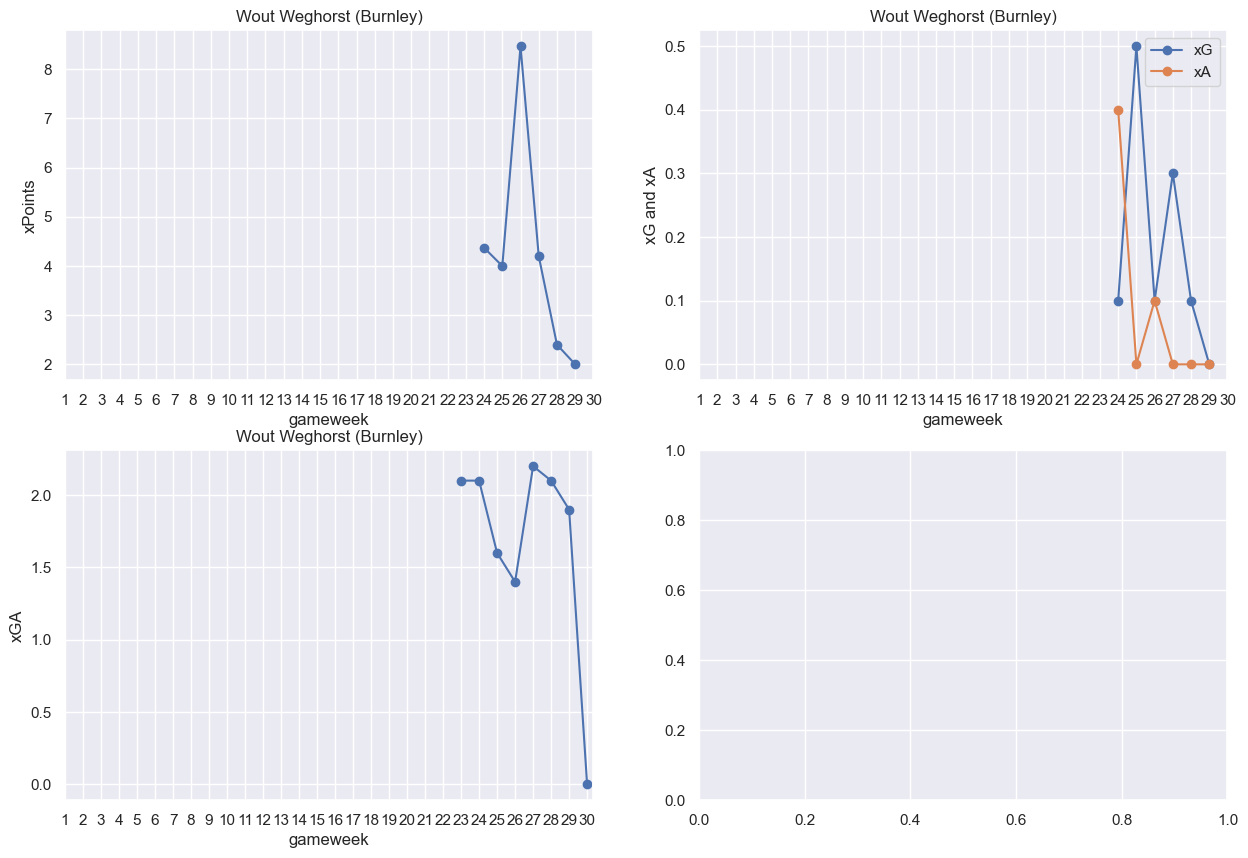

In [15]:
# find player index
name_string = 'Wegho'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 266

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
session = requests.session()

In [17]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [18]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 
#"redirect_uri": "https://fantasy.premierleague.com/",
#'redirect_uri': 'https://fantasy.premierleague.com/api/bootstrap-static/',
'app': 'plfpl-web'
}

headers = {
   'authority': 'users.premierleague.com' ,
   'cache-control': 'max-age=0' ,
   'upgrade-insecure-requests': '1' ,
   'origin': 'https://fantasy.premierleague.com' ,
   'content-type': 'application/x-www-form-urlencoded' ,
   'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36' ,
   'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' ,
   'sec-fetch-site': 'same-site' ,
   'sec-fetch-mode': 'navigate' ,
   'sec-fetch-user': '?1' ,
   'sec-fetch-dest': 'document' ,
   'referer': 'https://fantasy.premierleague.com/my-team' ,
   'accept-language': 'en-US,en;q=0.9,he;q=0.8' ,
}

session.post(url, data=payload, headers=headers)

<Response [200]>

In [19]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [20]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [21]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 64.13394795669721
Predicted points next gameweek: 59.30310106277466


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 31 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
333,Forster,Southampton,44,12.0,3.1,3.376216,3.516250,3.403993,3.769469,32.828999,1.609548
142,James,Chelsea,62,17.0,6.4,5.562972,10.932196,10.932196,4.375960,35.488124,2.234143
237,Alexander-Arnold,Liverpool,84,26.0,7.2,6.508953,7.469129,5.896180,4.987222,36.967380,2.245802
256,Cancelo,Manchester City,69,27.0,6.0,5.809643,5.520487,5.677897,5.788755,37.931322,2.211693
22,Saka,Arsenal,68,28.0,4.9,4.399309,7.107496,5.516658,4.134736,38.085421,1.687058
701,Kulusevski,Tottenham,63,9.0,5.2,4.854388,7.858290,6.123426,3.747274,29.644705,1.934035
138,Mount,Chelsea,75,24.0,5.1,4.757753,7.627515,5.523096,4.258842,34.989021,1.737286
196,Raphinha,Leeds United,65,27.0,4.1,4.621843,7.059551,5.449078,4.263104,29.841374,1.812836
233,Salah,Liverpool,133,27.0,8.2,7.815741,16.118366,10.412826,6.646851,49.698710,2.143110



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 31 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,18.0,3.3,3.282714,3.544404,3.378657,3.392389,28.215439,1.621217
518,Broja,Southampton,55,25.0,3.2,3.229680,3.225000,3.966667,3.889658,31.245526,1.377140
470,Ait Nouri,Wolves,44,17.0,4.2,3.373942,1.931456,2.817132,3.129271,21.891502,1.608464
290,Williams,Norwich City,39,23.0,1.5,1.862731,1.407750,2.261146,2.701753,20.264906,0.943231


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)